# Learning curve

In the following we would like to estimate if more training data really will improve the score of our models. We exemplify this using a simple classification data set with information on success/failure per data point. We use the sklearn function learning_curve to visualize what happens if we assign different ratios to training/test data sets and briefly compare the results for KNN and logictic regression learning algorithms.

In [84]:
#import necessary packages
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib.pyplot as plt

from helper import plot_classifier #helper.py is saved in the repository

In [85]:
#define data frame
df = pd.read_csv("classification.csv")

df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [86]:
df.shape

(297, 3)

In [87]:
#define variables
X = df[["age","interest"]].values

Y = df["success"].values # single brackets


#rescale data set
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve

#automatically separates data set into different ratios of training/test sets
train_sizes_abs, train_scores, test_scores = learning_curve(KNeighborsClassifier(), X, Y)

/Users/Andreas/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [89]:
#?learning_curve

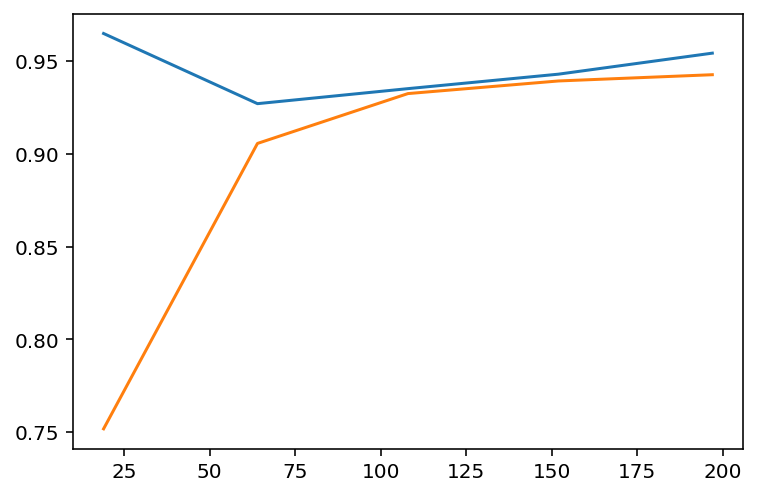

In [90]:
#plotting the results for averaged scores over training set sizes
plt.plot(train_sizes_abs, np.mean(train_scores, axis = 1))
plt.plot(train_sizes_abs, np.mean(test_scores, axis = 1))
plt.show()

Comment: The blue curve indicates the training score data. Even with much more data an improvement may not be reached. Notice that the data set has < 300 entries.

We may compare with a classification via logistic regression:

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

#good if one does not know if data is ordered
X, Y = shuffle(X,Y)

#one may also use cross-validation by settin cv = integer
train_sizes_abs, train_scores, test_scores = learning_curve(LogisticRegression(), X, Y, cv = 10)

/Users/Andreas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Andreas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Andreas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Andreas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Andreas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

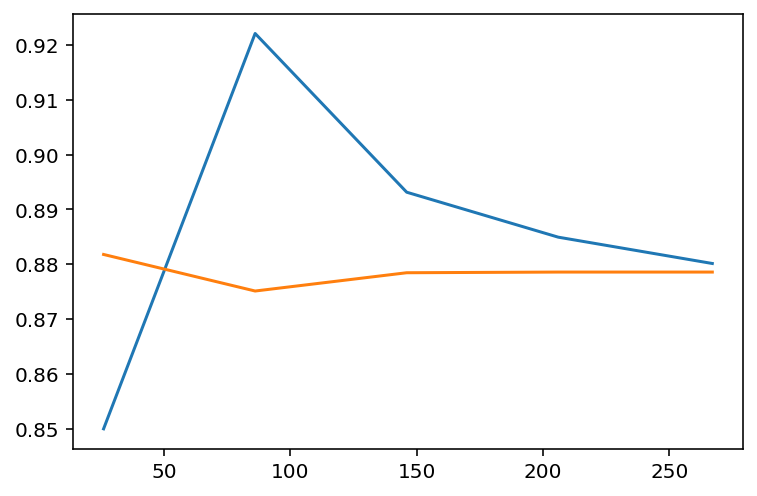

In [92]:
#plotting the results for averaged scores over training set sizes
plt.plot(train_sizes_abs, np.mean(train_scores, axis = 1))
plt.plot(train_sizes_abs, np.mean(test_scores, axis = 1))
plt.show()